In [1]:
# @title
%env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

env: PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


In [2]:
# @title
import tensorflow
import numpy as np
import pandas as pd

# text processing libraries
import re
import string
import nltk

from nltk.corpus import stopwords #!!!!! a changer avec notre data!!!!!!!!!!!!!!

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn


import warnings
warnings.filterwarnings("ignore")
import random
import time

import os

# Uploading Arabic and Arabizi datasets

In [3]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# @title
#Importing arabic data
df_arabic= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/arabic_train.csv')
df_arabic.head()

,text,label
0,و شكرا ربي يعينك,0
1,يستغل شنية,0
2,شخص رائع و عندوا مستقبل هايل برافواا جعفور,0
3,خرجوه لا وه طحان,1
4,توا اكثر من سبوع و احنا هكا,1


In [5]:
# @title
#Importing arabizi data
df_arabizi= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/arabizi_train.csv')
df_arabizi.head()

,text,label
0,aya hezelouna boutoula zarzis na7taflo biha m3...,0
1,tosref wdjib joueret mar7ba t7ebech ib3id zbou...,1
2,nour nour mchala fawzi be gamra,0
3,malyoun,0
4,5omej monacht mast bhim maya3rfch ya7ki lokzaa...,1


In [6]:
# @title
#Splitting Data (Arabic)
from sklearn.model_selection import train_test_split
X_arabic=df_arabic.drop('label', axis=1)
y_arabic=df_arabic['label']
X_arabic_train, X_arabic_test, y_arabic_train, y_arabic_test = train_test_split(X_arabic, y_arabic, test_size=0.2, random_state=42)

In [7]:
# @title
X_arabic_train.head()

,text
7325,رجل دولة بالفعل تحتاجه تونس ربي يكون بالعون
45888,سلفو معلم بوقبة الستنه
57423,امينم في زمنو كانتر فيل ه
35316,مرتك ولا مرتك صاحبك سي المسكني دخت انا وين سي ...
6850,صطوفة لمعلم


In [8]:
# @title
y_arabic_train.head()

7325     0
45888    0
57423    0
35316    1
6850     0
Name: label, dtype: int64

In [9]:
# @title
#Splitting Data (Arabizi)
from sklearn.model_selection import train_test_split
X_arabizi=df_arabizi.drop('label', axis=1)
y_arabizi=df_arabizi['label']
X_arabizi_train, X_arabizi_test, y_arabizi_train, y_arabizi_test = train_test_split(X_arabizi, y_arabizi, test_size=0.2, random_state=42)

In [11]:
# @title
print('Arabic train shape: ', X_arabic_train.shape ,"and arabic test shape is",X_arabic_test.shape)

Arabic train shape:  (48473, 1) and arabic test shape is (12119, 1)


In [12]:
# @title
print('Arabizi train shape: ', X_arabizi_train.shape ,"and arabizi test shape is",X_arabizi_test.shape)

Arabizi train shape:  (47190, 1) and arabizi test shape is (11798, 1)


In [13]:
# @title
df_arabic.shape, df_arabizi.shape

((60592, 2), (58988, 2))

In [14]:
# @title
X_arabic_train.sample(15,random_state=1)

,text
2816,جعفور طلع حساس وولد ناس يحس بغيرو اكثر مالحكومة
25344,احلا على قلب مال لعصل
25314,محلاكم
326,نحن نعشق الحوار التونسي
47391,ب اما فما حاجة اخرى ديما فسخ كنترات و اعطي اعا...
46060,صغاري فيسي ل ادرس مايل فليد اكتف سبر تن
26443,معلم
54394,كملها اليت والله ملول هاتنا ضراتلي مسطرة و بعد...
55568,انتي زادا عيدك مبروك كل عام هاي ب خير ان اوست ...
57150,وين نلقى لفلم


In [15]:
# @title
X_arabizi_train.sample(15,random_state=1)

,text
17499,masta da5al rouha tefhem lela mizou
7759,in7itat mostawayet
47340,rajel
21447,samy fahri top
45954,manjmch rou7ou wa7dou bde ylamed a7zeb sad9ni ...
37317,masite wili imha
26739,mahlekom sfekseyia mahla lahjtkom hada tamthil...
8031,tkamel wl
16041,nishli marbih
10427,rajaa montasar louhichi yousef 3almi


In [16]:

# @title
X_arabic_test.sample(15,random_state=1)

,text
20999,اخيه وتفوه مستين الكل
54204,بالهي نجمو نشروي اوي نرمه على بناك المهم يجيت ...
48598,باللاهي اعمل قانوني تقول فيه الي كل واحد يعمل ...
34104,عالمي والله
10045,يعتبر من اسباب الإرهاب
34539,تمرض بال كليرة
3416,بطل بطل
13712,مسلسل نسيبتي العزيزة كلو هايل بصح هذا الجزء كي...
40036,طرات نيك امك
26537,ممصتو


In [17]:
# @title
X_arabizi_test.sample(15,random_state=1)

,text
50860,marzen mliktou
6669,lo5rin metcherkin 7a9 tayara
46075,sawtha w ahsasha yehblou machalah 3liha missa ...
25029,chbik mamchitech leli matou 7adeth kitar mafih...
53601,5sarna tertib wmla79a laken ilah ghaleb hadhik...
14539,pf
27887,bravoio
4034,ta7an
31165,ma5yeb zok
53641,sidi rayess el7oukouma hedha hoa etawassol es7...


In [18]:
# @title
X_arabic_train.head()

,text
7325,رجل دولة بالفعل تحتاجه تونس ربي يكون بالعون
45888,سلفو معلم بوقبة الستنه
57423,امينم في زمنو كانتر فيل ه
35316,مرتك ولا مرتك صاحبك سي المسكني دخت انا وين سي ...
6850,صطوفة لمعلم


In [19]:
# @title
X_arabizi_train.head()

,text
34507,il9inah echar antza
22408,bde ywada3
40493,guere ghodwa kasba
29253,madam wajiha metha9fa testahak 3odhwa majles c...
47659,fanen mtale9 inchlh rabi ywaf9a


In [20]:
# @title
y_arabic_train.head()

7325     0
45888    0
57423    0
35316    1
6850     0
Name: label, dtype: int64

In [21]:
# @title
y_arabizi_train.head()

34507    0
22408    0
40493    1
29253    0
47659    0
Name: label, dtype: int64

## Data **Visualisation**

In [22]:
# @title
# negative arabic comments
negative_arabic = X_arabic_train[y_arabic_train==1]['text']
negative_arabic.values[4]

'قليل تربية ماصت ماصت ماصت'

In [23]:
# @title
# negative arabizi comments
negative_arabizi = X_arabizi_train[y_arabizi_train==1]['text']
negative_arabizi.values[2]

'bled bkolha fi 7it w ente sa3ida w ilah t9oli chamta fihom nefhmek ama sa3ida twali 9albek mit w ma t7esh'

In [24]:
# @title
# positive arabic comments
positive_arabic = X_arabic_train[y_arabic_train==0]['text']
positive_arabic.values[6]

'سلام'

In [25]:
# @title
# positive arabizi comments
positive_arabizi = X_arabizi_train[y_arabizi_train==0]['text']
positive_arabizi.values[6]

'lazem el7okouma totle9 sarah echabeyn makenech yosbeh edostour 4alet'

In [26]:
# @title
#Distribution of the label Column
print(y_arabic_train.value_counts())
#not a good distribution

label
0    29843
1    18630
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

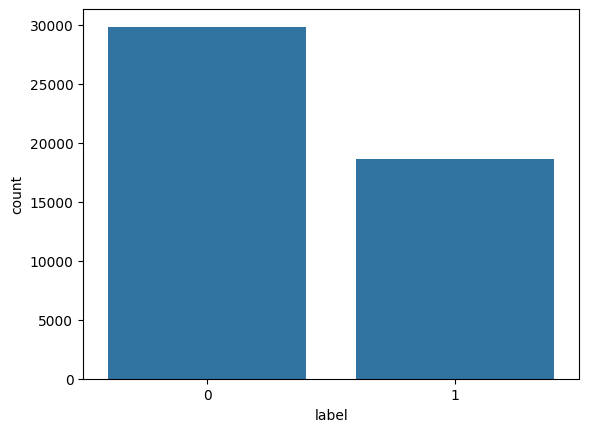

In [27]:
# @title
#Using seaborn to visualize the distribution of the label Column
sns.barplot(y_arabic_train.value_counts())

<Axes: xlabel='label', ylabel='count'>

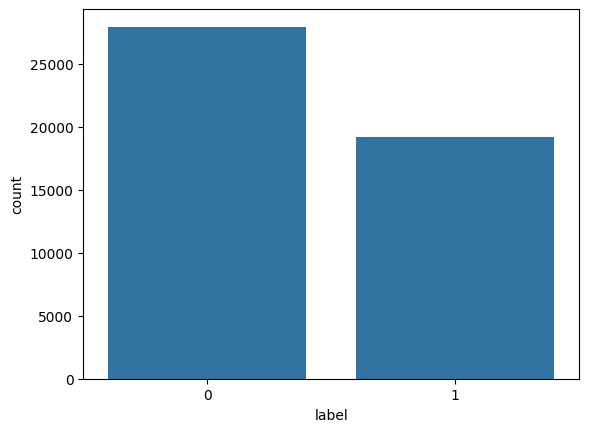

In [28]:
# @title
#Using seaborn to visualize the distribution of the label Column
sns.barplot(y_arabizi_train.value_counts())

## Arabizi Data **preprocessing**

In [29]:
# @title
#Missing values
X_arabizi_train.isnull().sum()
#--> No missing values

text    0
dtype: int64

In [30]:
# @title
aux_arabizi = pd.DataFrame()
aux_arabizi['text'] = X_arabizi_train['text']
aux_arabizi['label'] = y_arabizi_train

In [31]:
# @title
aux_test_arabizi = pd.DataFrame()
aux_test_arabizi['text'] = X_arabizi_test['text']
aux_test_arabizi['label'] = y_arabizi_test

In [32]:
# @title
def remove_consec_duplicates(s):
    new_s = ""
    prev = ""
    for c in s:
        if len(new_s) == 0:
            new_s += c
            # print("if 1 new_s",new_s)
            prev = c
            #print("if 1 prev",prev)
        if c == prev and c!="h" and c!="f": # except "h"
            continue
        else:
            new_s += c
            #print("if 2 new_s",new_s)
            prev = c
            #print("if 2 prev",prev)
    return new_s

In [33]:
# @title
aux_arabizi["text"]=aux_arabizi['text'].apply(lambda x :remove_consec_duplicates(x))
aux_test_arabizi["text"]=aux_test_arabizi['text'].apply(lambda x :remove_consec_duplicates(x))

In [34]:
# @title
def arabizi_data_cleaning(text):
    text = text.lower() #Make text lowercase
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove links
    text = re.sub('<.*?>+', '', text) #remove text in <...>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('\n', '', text) #remove end of line character
    text = re.sub('3','a',text)
    text = re.sub('2','a',text)
    text = re.sub('4','dh',text)
    text = re.sub('5','kh',text)
    text = re.sub('7','h',text)
    text = re.sub('9','k',text)
    text = re.sub('8','gh',text)
    return text


In [35]:
# @title
aux_arabizi.head()

,text,label
34507,il9inah echar antza,0
22408,bde ywada3,0
40493,guere ghodwa kasba,1
29253,madam wajiha metha9fa testahak 3odhwa majles c...,0
47659,ffanen mtale9 inchlh rabi ywaf9a,0


In [36]:
# @title
aux_arabizi['text'] = aux_arabizi['text'].apply(lambda x: arabizi_data_cleaning(x))
aux_test_arabizi['text'] = aux_test_arabizi['text'].apply(lambda x: arabizi_data_cleaning(x))

In [37]:
# @title
aux_arabizi.head()

,text,label
34507,ilkinah echar antza,0
22408,bde ywadaa,0
40493,guere ghodwa kasba,1
29253,madam wajiha methakfa testahak aodhwa majles c...,0
47659,ffanen mtalek inchlh rabi ywafka,0


In [38]:
# @title

#removing words with a length less than 2
aux_arabizi["text"] = aux_arabizi["text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
aux_test_arabizi["text"] = X_arabizi_test["text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))

In [39]:
# @title
#size of vocabulary before and after preprocessing
corpus1_arabizi = ' '.join(list(X_arabizi_train['text']))

print('Number of tokens before normalization:',len(set((corpus1_arabizi.split(' ')))))

corpus2_arabizi = ' '.join(list(aux_arabizi['text']))

print('Number of tokens after normalization:',len(set((corpus2_arabizi.split(' ')))))

print("Number of words dropped after normalization and preprocessing is",len(set((corpus1_arabizi.split(' '))))-len(set((corpus2_arabizi.split(' ')))))

Number of tokens before normalization: 89716
Number of tokens after normalization: 83481
Number of words dropped after normalization and preprocessing is 6235


arabic data **preprocessing**

In [40]:
# @title
#Missing values
X_arabic_train.isnull().sum()
#--> No missing values

text    0
dtype: int64

In [41]:
# @title
aux_arabic = pd.DataFrame()
aux_arabic['text'] = X_arabic_train['text']
aux_arabic['label'] = y_arabic_train

In [42]:
# @title
aux_test_arabic = pd.DataFrame()
aux_test_arabic['text'] = X_arabic_test['text']
aux_test_arabic['label'] = y_arabic_test

In [43]:
# @title
def remove_consec_duplicates(s):
    new_s = ""
    prev = ""
    for c in s:
        if len(new_s) == 0:
            new_s += c
            # print("if 1 new_s",new_s)
            prev = c
            #print("if 1 prev",prev)
        if c == prev and c!="h" and c!="f": # except "h"
            continue
        else:
            new_s += c
            #print("if 2 new_s",new_s)
            prev = c
            #print("if 2 prev",prev)
    return new_s

In [44]:
# @title
aux_arabic["text"]=aux_arabic['text'].apply(lambda x :remove_consec_duplicates(x))
aux_test_arabic["text"]=aux_test_arabic['text'].apply(lambda x :remove_consec_duplicates(x))

In [45]:
# @title
!pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 4.0 MB/s eta 0:00:00


In [46]:
# @title
import pyarabic.araby as araby
def preprocess_arabic(word):
    word = araby.strip_harakat(
        word
    )  # Remove diacritics exemple: 'مَرْحَباً' -> 'مرحبا'
    word = araby.strip_tashkeel(word)
    word = araby.strip_lastharaka(word)
    word = araby.strip_diacritics(word)
    word = araby.strip_tatweel(word)
    word = araby.normalize_hamza(
        word, method="tasheel"
    )  # Normalize hamza exemple: 'ء' -> 'ا'
    word = trans.normalize_digits(
        word, source="all", out="west"
    )  # Normalize digits exemple: '١٢٣' -> '123'
    word = "".join(
        mapping.get(c, c) for c in word
    )  # Replace arabic non general characters exemple: 'ء' -> 'ا'
    word = "".join(
        char for char, _ in itertools.groupby(word)
     )  # Remove repeating characters

    return word
def arabic_data_cleaning(text):
    text = text.lower() #Make text lowercase
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove links
    text = re.sub('<.*?>+', '', text) #remove text in <...>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('\n', '', text) #remove end of line character
    text = re.sub('[^\u0600-\u06FF\s]', '', text)  # Remove non-Arabic characters except spaces
    return text

In [47]:
# @title
aux_arabic.head()

,text,label
7325,رجل دولة بالفعل تحتاجه تونس ربي يكون بالعون,0
45888,سلفو معلم بوقبة الستنه,0
57423,امينم في زمنو كانتر فيل ه,0
35316,مرتك ولا مرتك صاحبك سي المسكني دخت انا وين سي ...,1
6850,صطوفة لمعلم,0


In [48]:
# @title

mapping = {

'\uFE8D' : '\u0627', # ARABIC LETTER ALEF WITH HAMZA ABOVE to ARABIC LETTER ALEF
'\uFE8E' : '\u0627',


'\uFE8F' : '\u0628',
'\uFE90' : '\u0628',
'\uFE92' :' \u0628',
'\uFE91' : '\u0628',


'\uFE95' :'\u062A',
'\uFE96' : '\u062A',
'\uFE98' : '\u062A',
'\uFE97' : '\u062A',


'\uFE99' : '\u062B',
'\uFE9A' : '\u062B',
'\uFE9C' : '\u062B',
'\uFE9B' : '\u062B',


'\uFE9D' : '\u062C',
'\uFE9E' : '\u062C',
'\uFEA0' : '\u062C',
'\uFE9F' : '\u062C',

'\uFEA1' : '\u062D',
'\uFEA2' : '\u062D',
'\uFEA4' : '\u062D',
'\uFEA3' : '\u062D',

'\uFEA5' : '\u062E',
'\uFEA6' : '\u062E',
'\uFEA8' : '\u062E',
'\uFEA7' : '\u062E',

'\uFEA9' : '\u062F',
'\uFEAA' : '\u062F',

'\uFEAB' : '\u0630',
'\uFEAC' : '\u0630',

'\uFEAD' : '\u0631',
'\uFEAE' : '\u0631',

'\uFEAF' : '\u0632',
'\uFEB0' : '\u0632',

'\uFEB1' : '\u0633',
'\uFEB2' : '\u0633',
'\uFEB4' : '\u0633',
'\uFEB3' : '\u0633',

'\uFEB5' : '\u0634',
'\uFEB6' : '\u0634',
'\uFEB8' : '\u0634',
'\uFEB7' : '\u0634',

'\uFEB9' : '\u0635',
'\uFEBA' : '\u0635',
'\uFEBC' : '\u0635',
'\uFEBB' : '\u0635',

'\uFEBD' : '\u0636',
'\uFEBE' : '\u0636',
'\uFEC0' : '\u0636',
'\uFEBF': '\u0636',

'\uFEC1' : '\u0637',
'\uFEC2' : '\u0637',
'\uFEC4' : '\u0637',
'\uFEC3' : '\u0637',

'\uFEC5' : '\u0638',
'\uFEC6' : '\u0638',
'\uFEC8' : '\u0638',
'\uFEC7' : '\u0638',

'\uFEC9' : '\u0639',
'\uFECA' : '\u0639',
'\uFECC' : '\u0639',
'\uFECB' : '\u0639',

'\uFECD' : '\u063A',
'\uFECE' : '\u063A',
'\uFED0' : '\u063A',
'\uFECF' : '\u063A',

'\uFED1' : '\u0641',
'\uFED2' : '\u0641',
'\uFED4' : '\u0641',
'\uFED3' : '\u0641',

'\uFED5' : '\u0642',
'\uFED6' : '\u0642',
'\uFED8' : '\u0642',
'\uFED7' : '\u0642',

'\uFED9' : '\u0643',
'\uFEDA' : '\u0643',
'\uFEDC' : '\u0643',
'\uFEDB' : '\u0643',

'\uFEDD' : '\u0644',
'\uFEDE' : '\u0644',
'\uFEE0' : '\u0644',
'\uFEDF' : '\u0644',


'\uFEE1' : '\u0645',
'\uFEE2' : '\u0645',
'\uFEE4' : '\u0645',
'\uFEE3' : '\u0645',


'\uFEE5' : '\u0646',
'\uFEE6' : '\u0646',
'\uFEE8' : '\u0646',
'\uFEE7' : '\u0646',


'\uFEE9' : '\u0647',
'\uFEEA' : '\u0647',
'\uFEEC' : '\u0647',
'\uFEEB' : '\u0647',


'\uFEED' : '\u0648',
'\uFEEE' : '\u0648',


'\uFEF1' : '\u064A',
'\uFEF2' : '\u064A',
'\uFEF4' : '\u064A',
'\uFEF3' : '\u064A',

'\uFE81' : '\u0622',
'\uFE82' : '\u0622',

'\uFE93' : '\u0629',
'\uFE94' : '\u0629',

'\uFEEF' : '\u0649',
'\uFEF0' : '\u0649'
}

In [49]:
# @title
import pyarabic.trans as trans
import itertools
aux_arabic['text'] = aux_arabic['text'].apply(lambda x: arabic_data_cleaning(x))
aux_arabic['text'] = aux_arabic['text'].apply(lambda x: preprocess_arabic(x))

aux_test_arabic['text'] = aux_test_arabic['text'].apply(lambda x: arabic_data_cleaning(x))
aux_test_arabic['text'] = aux_arabic['text'].apply(lambda x: preprocess_arabic(x))

In [50]:
# @title
aux_arabic.head()

,text,label
7325,رجل دولة بالفعل تحتاجه تونس ربي يكون بالعون,0
45888,سلفو معلم بوقبة الستنه,0
57423,امينم في زمنو كانتر فيل ه,0
35316,مرتك ولا مرتك صاحبك سي المسكني دخت انا وين سي ...,1
6850,صطوفة لمعلم,0


In [51]:
# @title
#removing words with a length less than 2
aux_arabic["text"] = aux_arabic["text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
aux_test_arabic["text"] = X_arabic_test["text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))

In [52]:
# @title
#size of vocabulary before and after preprocessing
corpus1_arabic = ' '.join(list(X_arabic_train['text']))

print('Number of tokens before normalization:',len(set((corpus1_arabic.split(' ')))))

corpus2_arabic = ' '.join(list(aux_arabic['text']))

print('Number of tokens after normalization:',len(set((corpus2_arabic.split(' ')))))

print("Number of words dropped after normalization and preprocessing is",len(set((corpus1_arabic.split(' '))))-len(set((corpus2_arabic.split(' ')))))

Number of tokens before normalization: 69659
Number of tokens after normalization: 66081
Number of words dropped after normalization and preprocessing is 3578


# **word cloud **

In [ ]:
# @title
!pip install wordcloud

# **Arabizi Word Cloud **

In [53]:
# @title
import collections
from collections import Counter
# afficher les mots les plus repétés pour les sentiments positifs
print("les mots les plus repétés pour les sentiments positifs",Counter(" ".join(aux_arabizi["text"][aux_arabizi["label"]==0]).split()).most_common(40))

# afficher les mots les plus repétés pour les sentiments négatifs
print("les mots les plus repétés pour les sentiments négatifs",Counter(" ".join(aux_arabizi["text"][aux_arabizi["label"]==1]).split()).most_common(40))


les mots les plus repétés pour les sentiments positifs [('bravo', 3653), ('maalem', 1012), ('men', 823), ('ilah', 635), ('rabi', 626), ('merci', 603), ('ala', 587), ('khir', 515), ('ahla', 490), ('ahsen', 431), ('mahlek', 386), ('mabrouk', 375), ('saha', 352), ('tayara', 342), ('mahleha', 319), ('barcha', 303), ('aime', 296), ('tounes', 285), ('ila', 277), ('maak', 274), ('bien', 255), ('kol', 252), ('wahdek', 239), ('bravobravo', 237), ('wasel', 236), ('ena', 233), ('asal', 227), ('nheb', 225), ('teajebni', 222), ('ano', 208), ('eli', 204), ('tbarkalah', 201), ('courage', 199), ('walah', 192), ('ente', 180), ('etounsi', 176), ('hak', 175), ('nchala', 173), ('wrabi', 165), ('ekhdem', 164)]
les mots les plus repétés pour les sentiments négatifs [('maset', 1143), ('men', 844), ('ala', 736), ('tfouh', 673), ('masta', 509), ('ilah', 457), ('tahan', 415), ('eli', 400), ('masit', 373), ('kahba', 368), ('ken', 358), ('nik', 341), ('laset', 337), ('zebi', 331), ('aasba', 299), ('khir', 281), (

In [54]:
# @title
from collections import Counter
positifs=[]
négatifs=[]
for i in range(80):
    positifs.append((Counter(" ".join(aux_arabizi["text"][aux_arabizi["label"]==0]).split()).most_common(80))[i][0])
print(positifs)
for i in range(80):
    négatifs.append((Counter(" ".join(aux_arabizi["text"][aux_arabizi["label"]==1]).split()).most_common(80))[i][0])
print(négatifs)


['bravo', 'maalem', 'men', 'ilah', 'rabi', 'merci', 'ala', 'khir', 'ahla', 'ahsen', 'mahlek', 'mabrouk', 'saha', 'tayara', 'mahleha', 'barcha', 'aime', 'tounes', 'ila', 'maak', 'bien', 'kol', 'wahdek', 'bravobravo', 'wasel', 'ena', 'asal', 'nheb', 'teajebni', 'ano', 'eli', 'tbarkalah', 'courage', 'walah', 'ente', 'etounsi', 'hak', 'nchala', 'wrabi', 'ekhdem', 'tahiya', 'esaha', 'machalah', 'nmout', 'akwa', 'amin', 'halka', 'continuation', 'maalim', 'mahla', 'rajaa', 'lefriki', 'nour', 'yousef', 'rawaa', 'khedma', 'ykoun', 'rouhek', 'ywafkek', 'maa', 'top', 'eljazaaer', 'tahfouna', 'lazem', 'jaafour', 'nhebou', 'khouya', 'bsaraha', 'nhebha', 'rajel', 'wahda', 'hlowa', 'aana', 'vive', 'kal', 'ken', 'marzouki', 'alik', 'mahleh', 'enes']
['maset', 'men', 'ala', 'tfouh', 'masta', 'ilah', 'tahan', 'eli', 'masit', 'kahba', 'ken', 'nik', 'laset', 'zebi', 'aasba', 'khir', 'mila', 'ila', 'hedha', 'ente', 'tahana', 'miboun', 'tafeh', 'tounes', 'kalb', 'rabi', 'zok', 'walah', 'wala', 'ano', 'rak',

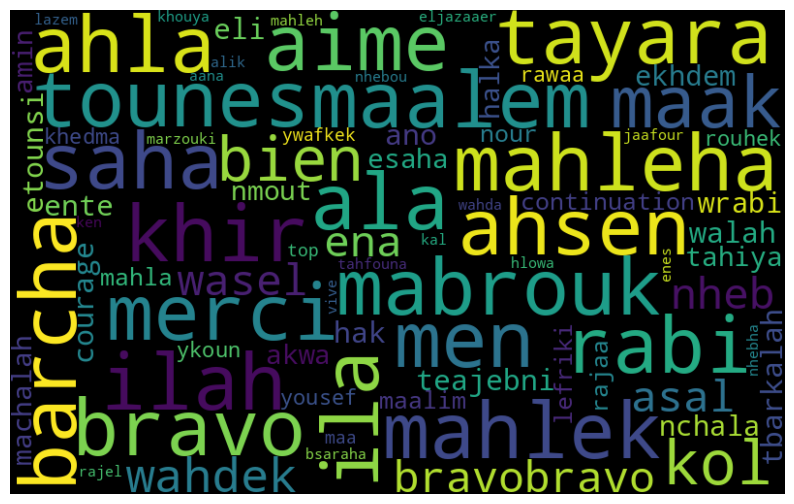

In [55]:
# @title
#positive
from wordcloud import WordCloud
positive_words =" ".join([text for text in positifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

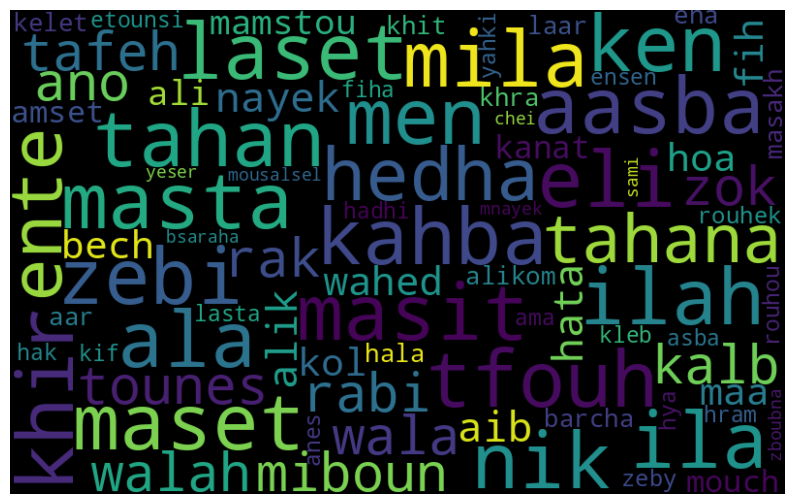

In [56]:
# @title
#negative
from wordcloud import WordCloud
négatifs_words =" ".join([text for text in négatifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80).generate(négatifs_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# **Arabic Word Cloud **

In [57]:
# @title
import collections
from collections import Counter
# afficher les mots les plus repétés pour les sentiments positifs
print("les mots les plus repétés pour les sentiments positifs",Counter(" ".join(aux_arabic["text"][aux_arabic["label"]==0]).split()).most_common(40))

# afficher les mots les plus repétés pour les sentiments négatifs
print("les mots les plus repétés pour les sentiments négatifs",Counter(" ".join(aux_arabic["text"][aux_arabic["label"]==1]).split()).most_common(40))


les mots les plus repétés pour les sentiments positifs [('ربي', 3693), ('برافو', 3497), ('على', 2538), ('الي', 2537), ('سليم', 2409), ('اله', 1775), ('انا', 1625), ('انشاءاله', 1615), ('باش', 1573), ('معلم', 1545), ('معاك', 1467), ('كان', 1450), ('تونس', 1424), ('برشا', 1320), ('اما', 1092), ('واله', 1064), ('فال', 900), ('راجل', 792), ('ديما', 785), ('انتي', 755), ('عليك', 685), ('موش', 672), ('بربي', 649), ('خير', 647), ('سلومة', 617), ('حتى', 609), ('جمعية', 597), ('لاس', 595), ('رياحي', 591), ('هذا', 565), ('هاذي', 553), ('مرسي', 547), ('شكون', 546), ('ولا', 546), ('واحد', 546), ('واء', 534), ('الكل', 532), ('معا', 529), ('احسن', 521), ('حاجة', 515)]
les mots les plus repétés pour les sentiments négatifs [('على', 2003), ('الي', 1466), ('كان', 1352), ('تفوه', 902), ('مالا', 832), ('باش', 828), ('اله', 800), ('فيه', 771), ('ماسط', 762), ('تونس', 750), ('نيك', 733), ('موش', 669), ('واله', 655), ('هذا', 651), ('ربي', 635), ('انتي', 605), ('برا', 599), ('زبي', 572), ('عليك', 568), ('حتى

In [58]:
# @title
from collections import Counter
positifs=[]
négatifs=[]
for i in range(80):
    positifs.append((Counter(" ".join(aux_arabic["text"][aux_arabic["label"]==0]).split()).most_common(80))[i][0])
print(positifs)
for i in range(80):
    négatifs.append((Counter(" ".join(aux_arabic["text"][aux_arabic["label"]==1]).split()).most_common(80))[i][0])
print(négatifs)

['ربي', 'برافو', 'على', 'الي', 'سليم', 'اله', 'انا', 'انشاءاله', 'باش', 'معلم', 'معاك', 'كان', 'تونس', 'برشا', 'اما', 'واله', 'فال', 'راجل', 'ديما', 'انتي', 'عليك', 'موش', 'بربي', 'خير', 'سلومة', 'حتى', 'جمعية', 'لاس', 'رياحي', 'هذا', 'هاذي', 'مرسي', 'شكون', 'ولا', 'واحد', 'واء', 'الكل', 'معا', 'احسن', 'حاجة', 'ناس', 'هوا', 'كلوب', 'فما', 'فيه', 'بالاهي', 'متع', 'توا', 'كيما', 'ريس', 'سامي', 'نحب', 'مبروك', 'عليه', 'علاء', 'جعفور', 'وال', 'شعب', 'كيف', 'فيها', 'تونسي', 'بال', 'محلاك', 'ياسر', 'صحة', 'بين', 'هكا', 'احنى', 'احلى', 'مال', 'لطفي', 'عام', 'اوست', 'اكثر', 'بور', 'مايس', 'خاتر', 'لازم', 'راك', 'قبل']
['على', 'الي', 'كان', 'تفوه', 'مالا', 'باش', 'اله', 'فيه', 'ماسط', 'تونس', 'نيك', 'موش', 'واله', 'هذا', 'ربي', 'انتي', 'برا', 'زبي', 'عليك', 'حتى', 'سليم', 'انا', 'ماصت', 'اما', 'امك', 'برشا', 'طحان', 'فال', 'راك', 'ولا', 'قحبة', 'واحد', 'عصبة', 'متع', 'راجل', 'بربي', 'ملا', 'ياسر', 'كيف', 'تافه', 'توا', 'حاجة', 'الكل', 'اخرى', 'فيها', 'انت', 'كلب', 'خير', 'عليه', 'مال', 'بالاهي'

In [59]:
# @title
!pip install python-bidi

In [60]:
# @title
!pip install arabic_reshaper

In [61]:
# @title
import arabic_reshaper
from bidi.algorithm import get_display

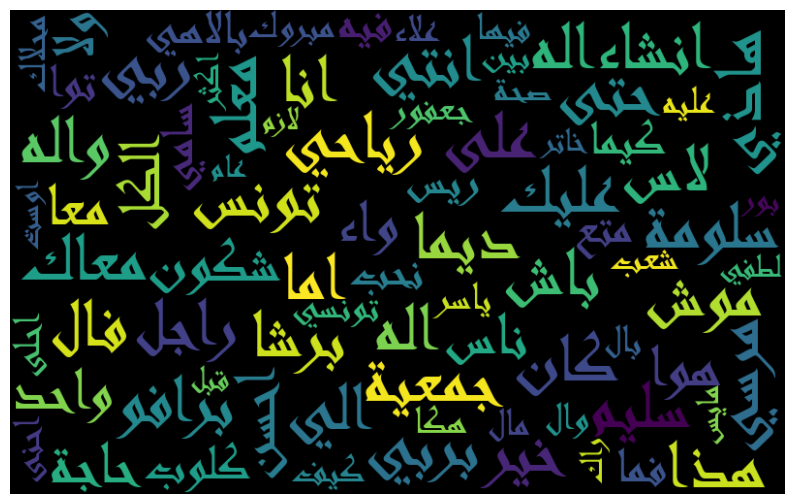

In [62]:
# @title
#positive
from wordcloud import WordCloud
positive_words =" ".join([text for text in positifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80, font_path='/content/drive/MyDrive/Colab Notebooks/andlso.ttf').generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

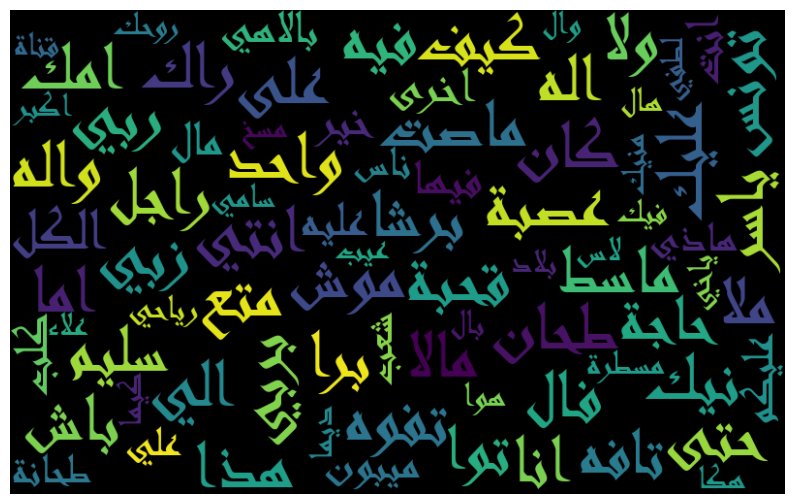

In [63]:
# @title
#negative
from wordcloud import WordCloud
négatifs_words =" ".join([text for text in négatifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80, font_path='/content/drive/MyDrive/Colab Notebooks/andlso.ttf').generate(négatifs_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Mixing the datasets

In [64]:
# @title
X_train_combined = pd.concat([X_arabic_train, X_arabizi_train], ignore_index=True)
y_train_combined = pd.concat([y_arabic_train, y_arabizi_train], ignore_index=True)

In [65]:
# @title
X_test_combined = pd.concat([X_arabic_test, X_arabizi_test], ignore_index=True)
y_test_combined = pd.concat([y_arabic_test, y_arabizi_test], ignore_index=True)

In [66]:
# @title
combined_train_df = pd.concat([X_train_combined, y_train_combined], axis=1)
combined_test_df = pd.concat([X_test_combined, y_test_combined], axis=1)

In [67]:
# @title
# Shuffling
combined_df = pd.concat([combined_train_df, combined_test_df], ignore_index=True)
shuffled_combined_df = combined_df.sample(frac=1, random_state=42)

In [68]:
# @title
shuffled_combined_df= shuffled_combined_df.iloc[:20000]

In [69]:
# @title
shuffled_combined_df.shape

(20000, 2)

In [70]:
# @title
# After shuffling, splitting the combined dataset back into training and test data
X_combined = shuffled_combined_df.drop(columns=['label'])
y_combined = shuffled_combined_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)


In [71]:
# @title
X_train.shape

(16000, 1)

# TunBert **Model**

In [72]:
# @title
!pip install transformers

In [73]:
# @title
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [74]:
# @title
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
pretrained_model= 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(pretrained_model, do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [75]:
# @title
from keras.preprocessing.sequence import pad_sequences

def preprocessing_dialect_for_tunbert(sentences,tokenizer,max_length=512):
  sentences = ["[CLS] " + text + " [SEP]" for text in sentences]
  tokenized_texts = [tokenizer.tokenize(sentence) for sentence in sentences]
  input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
  input_ids = pad_sequences(input_ids, maxlen=max_length, dtype="long", truncating="post", padding="post")
  attention_masks = []
  for seq in input_ids:
    seq_mask = [int(i>0) for i in seq]
    attention_masks.append(seq_mask)

  input_ids = torch.tensor(input_ids)
  attention_masks = torch.tensor(attention_masks)

  return input_ids,attention_masks

In [105]:
# @title
aux=pd.DataFrame()
aux['text']=X_train['text']
aux['label']=y_train


In [106]:
# @title
aux_test=pd.DataFrame()
aux_test['text']=X_test['text']
aux_test['label']=y_test


In [107]:
# @title
labels = aux.label.values
sentences=aux.text.values

In [108]:
# @title
input_ids,attention_masks= preprocessing_dialect_for_tunbert(sentences,tokenizer,max_length=512)

In [109]:
# @title
print(aux['text'][3])
print(input_ids[3])
print(attention_masks[3])

مرتك ولا مرتك صاحبك سي المسكني دخت انا وين سي على سكر ال بنميج
tensor([  101,  8038,  2843,  8873,  3449,  2509,  3286,  3089,  8038, 17712,
         5677,  1038, 14341, 15544, 24826, 10882,  1021,  6672,  3775,  3449,
        24281,  7570,  2050,  2273, 18995,  3676,  2475,  4313,  8038,  1056,
         7011,  2232,  8038, 14855, 16001,  8038, 10210,  2629,  9453,  2546,
         2375,  6358, 10147,  2102, 25933,  4328, 21617, 11333,  2683,  6199,
         5937, 23842,  4859,  1021,  4215,  1047, 25933,  7842,  2581,  2050,
         5622,  2243,  1037, 29337,  3270,  1041, 18878,  2140,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
 

In [110]:
# @title
#prepare the data for training(90%) and validation(10%)
from sklearn.model_selection import train_test_split

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=2022, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2022, test_size=0.1)

In [111]:
# @title
#Converting the data arrays into PyTorch tensors
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [112]:
# @title
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
#shuffles the data to ensure that the model sees different samples in each epoch.

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)
#load batches of validation data and iterates over the validation dataset sequentially without shuffling the data.
#ensures that each sample in the validation set exactly once, in a predetermined order.

**Bert Model for ClassificationTasks**

In [113]:
# @title
%%time
import torch.nn as nn
from transformers import BertModel
#binary classification
class TUNBertClassfier(nn.Module):# Create the TUNBERTClassfier class
    def __init__(self, freeze_bert=False):
        super(TUNBertClassfier, self).__init__()

        hidden_size_of_bert,hidden_size_of_Classfier,output =768,50,2

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.classifier = nn.Sequential( #classifaction layer
            nn.Linear(hidden_size_of_bert, hidden_size_of_Classfier),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size_of_Classfier,output)
        )
        if freeze_bert: # Freeze the BERT model allows for fine-tuning only the classifier layers,
            for param in self.bert.parameters():
                param.requires_grad = False


    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        #for classification extract the last hidden layer of the [CLS] token
        last_hidden_state_cls = outputs[0][:, 0, :]
        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 56 µs, sys: 0 ns, total: 56 µs
Wall time: 59.8 µs


### **hyper-parameters ,Initialize the tunizibert Classifier**


In [114]:
# @title
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):

    tunbert_classifier = TUNBertClassfier(freeze_bert=False) #the parameters of the BERT model will not be frozen during training.

    tunbert_classifier.to(device) # Tell PyTorch to run the model on GPU

    optimizer = AdamW(tunbert_classifier.parameters(),
                      lr=5e-5,
                      eps=1e-8)#initializes the AdamW optimizer for updating the parameters of the model during training.

    total_steps = len(train_dataloader) * epochs

    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0,
                                                num_training_steps=total_steps)
    return tunbert_classifier, optimizer, scheduler

# **Training**

In [115]:
# @title
import random
import time

loss_fn = nn.CrossEntropyLoss() # Specify loss function

def set_seed(seed_value=42):#sets the random seed for reproducibility across different runs.
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):

    print("Start training...\n")
    for epoch_i in range(epochs):
        print('            ======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('\n')

        print(f"{'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        t0_epoch, t0_batch = time.time(), time.time() # Measure the elapsed time of each epoch

        total_loss, batch_loss, batch_counts = 0, 0, 0 # Reset tracking variables at the beginning of each epoch

        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1

            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            model.zero_grad()

            logits = model(b_input_ids, b_attn_mask)

            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                print(f"{step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)

        if evaluation == True:

            val_loss, val_accuracy = evaluate(model, val_dataloader, loss_fn)

            time_elapsed = time.time() - t0_epoch

            print(f"{'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
            print("\n")
            print(" val_accuracy: {0:.2f}".format(val_accuracy))

        print("\n")

    print("Training complete!")


'''def evaluate(model, val_dataloader):
    # Put the model into the evaluation mode. The dropout layers are disabled during
    model.eval()

    val_accuracy = []
    val_loss = []

    for batch in val_dataloader:
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy'''
def evaluate(model, dataloader, loss_fn):
    # Put the model into the evaluation mode. The dropout layers are disabled during
    model.eval()

    accuracy = []
    loss = []

    for batch in dataloader:
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        batch_loss = loss_fn(logits, b_labels)
        loss.append(batch_loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        acc = (preds == b_labels).cpu().numpy().mean() * 100
        accuracy.append(acc)

    # Compute the average accuracy and loss over the dataset.
    avg_loss = np.mean(loss)
    avg_accuracy = np.mean(accuracy)

    return avg_loss, avg_accuracy

In [87]:
"""# @title
del X_arabizi_train
del X_arabic_train
del X_arabic
del X_arabizi
del X_arabizi_test
del X_arabic_test
del X_train_combined
del X_test_combined
del aux_arabic
del aux_arabizi
del aux_test_arabic
del aux_test_arabizi
del combined_df
del combined_test_df
del combined_train_df
del y_arabic
del y_arabic_test
del y_arabic_train
del y_arabizi_test
del y_arabizi_train
del y_combined
del y_test_combined
del y_train_combined
del corpus1_arabic
del corpus1_arabizi
del corpus2_arabic
del corpus2_arabizi
del aux
del aux_test
del shuffled_combined_df

In [ ]:
# @title
import random
random.seed(42)    # Set seed for reproducibility
tunbert_classifier, optimizer, scheduler = initialize_model(epochs=3)
train(tunbert_classifier, train_dataloader, validation_dataloader, epochs=3, evaluation=True)

Start training...

            ======== Epoch 1 / 3 ========


 Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
  20    |   0.686298   |     -      |     -     |   28.87  
  40    |   0.647604   |     -      |     -     |   26.44  
  60    |   0.677454   |     -      |     -     |   27.32  
  80    |   0.673205   |     -      |     -     |   28.34  
  100   |   0.697872   |     -      |     -     |   29.61  
  120   |   0.694719   |     -      |     -     |   29.11  
  140   |   0.681986   |     -      |     -     |   28.95  
  160   |   0.677976   |     -      |     -     |   29.27  
  180   |   0.669874   |     -      |     -     |   29.21  
  200   |   0.665321   |     -      |     -     |   29.16  
  220   |   0.653153   |     -      |     -     |   29.14  
  240   |   0.650361   |     -      |     -     |   29.15  
  260   |   0.638982   |     -      |     -     |   29.18  
  280   |   0.635007   |  

In [ ]:
# @title
import torch
torch.save(tunbert_classifier.state_dict(), '/content/drive/MyDrive/saved_models/tunbert1')


In [116]:
tunbert_classifier = TUNBertClassfier(freeze_bert=False)
tunbert_classifier.load_state_dict(torch.load('/content/drive/MyDrive/saved_models/tunbert1',  map_location=torch.device('cpu')))



<All keys matched successfully>

In [117]:
tunbert_classifier


TUNBertClassfier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementw

**Results**

In [118]:
# @title
from keras import backend as K

def recall_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_(y_true, y_pred)
    recall = recall_(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [119]:
if next(tunbert_classifier.parameters()).device != 'cuda':
    tunbert_classifier.to('cuda')


In [ ]:
# Evaluate on training set
train_loss, train_accuracy = evaluate(tunbert_classifier, train_dataloader, loss_fn)
print(f"Training Loss: {train_loss}, Accuracy: {train_accuracy}")

# Evaluate on validation set
val_loss, val_accuracy = evaluate(tunbert_classifier, validation_dataloader, loss_fn)
print(f"Validation Loss: {val_loss}, Accuracy: {val_accuracy}")


In [ ]:
# @title
import torch
torch.save(tunbert_classifier.state_dict(), '/content/drive/MyDrive/saved_models/tunbert2')


In [120]:
tunbert_classifier = TUNBertClassfier(freeze_bert=False)
tunbert_classifier.load_state_dict(torch.load('/content/drive/MyDrive/saved_models/tunbert2'))


<All keys matched successfully>

### **Prediction**

In [121]:
# @title
import torch.nn.functional as F

def tunbert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)

    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [122]:
# @title
sentences_t=aux_test.text.values
test_inputs, test_masks = preprocessing_dialect_for_tunbert(sentences_t,tokenizer)

In [123]:
# @title
test_data = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [124]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tunbert_classifier.to(device)
probs = tunbert_predict(tunbert_classifier, test_dataloader)


In [125]:
# @title
probs

array([[0.01396591, 0.9860341 ],
       [0.80692303, 0.19307701],
       [0.01367273, 0.9863273 ],
       ...,
       [0.96096563, 0.03903441],
       [0.9727025 , 0.02729744],
       [0.01398951, 0.98601055]], dtype=float32)

In [126]:
# @title
test_data = aux_test['text']
#test_id = test['ID']
data_test = pd.DataFrame(data = {'text': aux_test['text'], 'negative' : probs[:,1] ,'postive' : probs[:,0]  })
#data_test = pd.DataFrame(data = {'id' : test_id ,'text': test['text'], 'negative' : probs[:,0] ,'postive' : probs[:,1]  })

In [127]:
# @title
data_test

,text,negative,postive
66233,wahid brahmi nahdilek vedio masa5 r5is 5amej a...,0.986034,0.013966
34180,انتا مع,0.193077,0.806923
91731,bsara7a ena may3ajbich hichem masset men 9bal,0.986327,0.013673
26677,كارو يبعيد و يفهم روحو ملي طردوه فال ماروكس,0.066286,0.933714
83665,9lil torbyaaa maset maset maset,0.986370,0.013630
...,...,...,...
55132,rais alhakiki,0.003520,0.996480
79907,noura klemek ma39oul wa9t s3ib enahtha bete no...,0.009588,0.990412
75805,nmchi nbadel fourniseur,0.039034,0.960966
32446,الراجل وجعني والله وبنتو لازم تقبل بمرتو امها ...,0.027297,0.972703


In [128]:
# @title
test1=[' ma5yebha el3icha fi tunes','bravo mahleeek y behi nhebek barcha','bara nik omek','9ahba',
       'eb3edni zebi rani mkarez','nakrheek y kaleb','manich farhan bel service mte3kom','rabi m3akom','fadetni rak']
sentences_t1=test1
test_inputs1, test_masks1 = preprocessing_dialect_for_tunbert(sentences_t1,tokenizer)
test_data1= TensorDataset(test_inputs1, test_masks1)
test_sampler1= SequentialSampler(test_data1)
test_dataloader1= DataLoader(test_data1, sampler=test_sampler1, batch_size=batch_size)
probs1 = tunbert_predict(tunbert_classifier, test_dataloader1)


In [129]:
# @title
probs1

array([[0.01355432, 0.9864457 ],
       [0.99743384, 0.00256612],
       [0.01360036, 0.98639965],
       [0.01382372, 0.9861763 ],
       [0.01358391, 0.9864161 ],
       [0.01368124, 0.9863188 ],
       [0.02090777, 0.97909224],
       [0.99713135, 0.00286859],
       [0.98993367, 0.01006635]], dtype=float32)

# saving the model

In [130]:
import torch
torch.save(tunbert_classifier.state_dict(), '/content/drive/MyDrive/saved_models/tunbert3')

# **gradio**

In [131]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.6 M

In [132]:
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
batch_size = 16
def text_to_sentiment(data):
  data=[data]
  app_inputs, app_masks = preprocessing_dialect_for_tunbert(data,tokenizer)
  app_data = TensorDataset(app_inputs, app_masks)
  app_sampler = SequentialSampler(app_data)
  app_dataloader = DataLoader(app_data, sampler=app_sampler, batch_size=batch_size)
  app_probs = tunbert_predict(tunbert_classifier, app_dataloader)
  app_score = pd.DataFrame(data = {'text': data, 'negative' : app_probs[:,1] ,'postive' : app_probs[:,0]  })
  if (app_score['negative'].mean()) > 0.5 :
    result='This is a toxic comment'
  else:
    result='This is a positive comment'
  return result, app_score

In [134]:
text = "mahlek zinek"
sentiment=text_to_sentiment(text)
sentiment

('This is a positive comment',
            text  negative   postive
 0  mahlek zinek  0.002686  0.997314)

In [ ]:
import gradio as gr
from transformers import pipeline

from keras.preprocessing.sequence import pad_sequences

asr = pipeline("automatic-speech-recognition", "facebook/wav2vec2-base-960h")



def speech_to_text(speech):
    text = asr(speech)["text"]
    return text

def text_to_sentiment(data):
  data=[data]
  app_inputs, app_masks = preprocessing_dialect_for_tunbert(data,tokenizer)
  app_data = TensorDataset(app_inputs, app_masks)
  app_sampler = SequentialSampler(app_data)
  app_dataloader = DataLoader(app_data, sampler=app_sampler, batch_size=batch_size)
  app_probs = tunbert_predict(tunbert_classifier, app_dataloader)
  app_score = pd.DataFrame(data = {'text': data, 'negative' : app_probs[:,1] ,'postive' : app_probs[:,0]  })
  if (app_score['negative'].mean()) > 0.5 :
    result='This is a toxic comment'
  else:
    result='This is a positive comment'
  return result


demo = gr.Blocks(theme='HaleyCH/HaleyCH_Theme')

with demo:
    audio_file = gr.Microphone()
    text = gr.Textbox()
    label = gr.Label()

    b1 = gr.Button("Recognize Speech")
    b2 = gr.Button("Classify Sentiment")

    b1.click(speech_to_text, inputs=audio_file, outputs=text)
    b2.click(text_to_sentiment, inputs=text, outputs=label)

demo.launch()

# audio

In [136]:
%cd /content/drive/MyDrive/Colab Notebooks/Audio_PFA

/content/drive/MyDrive/Colab Notebooks/Audio_PFA


In [ ]:
#!git clone https://huggingface.co/SalahZa/Tunisian_Automatic_Speech_Recognition

Cloning into 'Tunisian_Automatic_Speech_Recognition'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 44 (delta 12), reused 44 (delta 12), pack-reused 0 (from 0)
Unpacking objects: 100% (44/44), 27.23 KiB | 34.00 KiB/s, done.
Filtering content: 100% (10/10), 3.83 GiB | 8.67 MiB/s, done.
fatal: cannot exec '/content/drive/MyDrive/Colab Notebooks/Audio_PFA/Tunisian_Automatic_Speech_Recognition/.git/hooks/post-checkout': Permission denied


In [137]:
%cd Tunisian_Automatic_Speech_Recognition

/content/drive/MyDrive/Colab Notebooks/Audio_PFA/Tunisian_Automatic_Speech_Recognition


In [138]:
hyperparams_path = 'semi_wavlm_large_tunisian_ctc/1234/hyperparams.yaml'
test_csv_path = '/content/drive/MyDrive/Colab Notebooks/taric_test.csv'

In [140]:
!pip install speechbrain==0.5.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.7/355.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 16.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [142]:
import speechbrain
print(speechbrain.__version__)

0.5.7


In [143]:
from ruamel.yaml import YAML

yaml = YAML()

# Path to the hyperparams.yaml file
hyperparams_path = 'semi_wavlm_large_tunisian_ctc/1234/hyperparams.yaml'

# Read the YAML file
with open(hyperparams_path, 'r') as file:
    hyperparams = yaml.load(file)

# Update the 'source' parameter to the new path
hyperparams['wav2vec2']['source'] = '/gpfsstore/rech/nou/uzn19yk/wavlm/'

# Write the modified content back to the YAML file
with open(hyperparams_path, 'w') as file:
    yaml.dump(hyperparams, file)

# Verify the changes
!cat $hyperparams_path

# Generated 2023-09-08 from:
# /gpfsdsstore/projects/rech/nou/uzn19yk/switched_code_tunisian/train/tunisian_asr/hparams/train_semi.yaml
# yamllint disable
# ################################
# Model: wav2vec2 + DNN + CTC
# Augmentation: SpecAugment
# Authors: Titouan Parcollet 2021
# ################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1234
__set_seed: !!python/object/apply:torch.manual_seed [1234]
output_folder: results/semi_wavlm_large_tunisian_ctc/1234
wer_file: results/semi_wavlm_large_tunisian_ctc/1234/wer.txt
save_folder: results/semi_wavlm_large_tunisian_ctc/1234/save
train_log: results/semi_wavlm_large_tunisian_ctc/1234/train_log.txt

# URL for the biggest LeBenchmark wav2vec french.
wav2vec2_folder: results/semi_wavlm_large_tunisian_ctc/1234/save/wav2vec2_checkpoint

# Data files
data_folder: /gpfsscratch/rech/nou/uzn19yk/tunisian_junk  # e.g, /localscratch/cv-corpus-5.1-2020-06-22/fr
train_tsv_file: /gpfsscratch

In [144]:
!pip install fairseq
import fairseq
from fairseq.models.wav2vec import Wav2Vec2Model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 33.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=11291784 sha256=95d72b00b6f536a768ba6b1b2ed6969e46fea72add3c8fc70562db019a335fb7
  Stored in directory: /root/.cache/pip/wheels/e4/35/55/9c66f65ec7c83fd6fbc2b9502a0ac81b2448a1196159dacc32
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.wh

In [145]:
!python train_with_wavlm.py $hyperparams_path --test_csv $test_csv_path

/usr/local/lib/python3.10/dist-packages/speechbrain/dataio/dataio.py:26: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend(torchaudio_backend)
/usr/local/lib/python3.10/dist-packages/speechbrain/nnet/loss/stoi_loss.py:13: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend(torchaudio_backend)
/usr/local/lib/python3.10/dist-packages/speechbrain/lobes/augment.py:28: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend(torchaudio_backend)
Traceback (most recent call last):
  File "/content/drive/MyDrive/Colab Notebooks/Audio_PFA/Tunisian_Automatic_Speech_Recognition/train_with_wavlm.py", line 

In [ ]:
import gradio as gr
import requests
import base64

def recognize_audio(audio_data):
    # Read audio file as binary
    #with open(audio_file.name, "rb") as file:
        #audio_data = file.read()
    file_name,file_data= audio_data
    # Encode audio data to base64
    #encoded_audio = base64.b64encode(audio_data).decode('utf-8')
    encoded_audio = base64.b64encode(file_data).decode('utf-8')

    # Prepare JSON payload
    payload = {
        "data": [
            {"name": file_name, "data": f"data:audio/wav;base64,{encoded_audio}"}
        ]
    }

    # Send POST request
    response = requests.post("https://salahza-tunisian-speech-recognition.hf.space/run/predict", json=payload)

    # Process the response
    if response.status_code == 200:
        result = response.json()
        if "data" in result:
            return result["data"][0]  # Return the first item in the "data" array
        else:
            return "Error: 'data' not found in the response"
    else:
        return f"Error: Request failed with status code {response.status_code}"

demo = gr.Blocks()

with demo:
    #audio_input=gr.Audio(sources="microphone", visible=True)
    audio_input = gr.Microphone()
    text = gr.Textbox()
    label = gr.Label()

    b1 = gr.Button("Recognize Speech")

    b1.click(recognize_audio, inputs=audio_input, outputs=text)

demo.launch(debug=True)


